In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [97]:
rating.head()
#the head of the list.

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


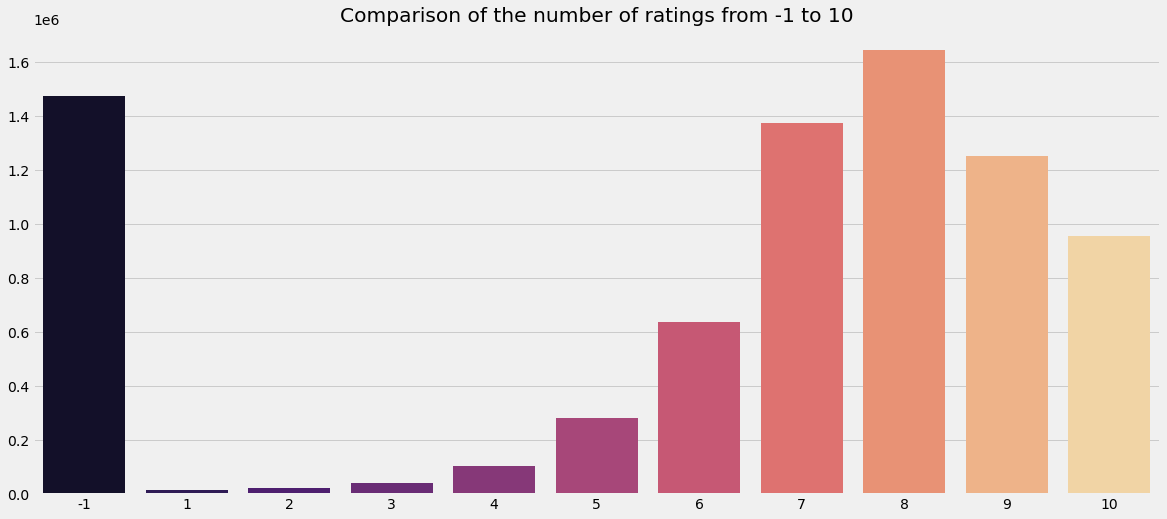

In [98]:
#The code starts by creating a list of ratings.
#The code then creates a bar plot with the index as the x-axis and values as the y-axis.
#The code sets up title for the graph, which is "Comparison of the number of ratings from -1 to 10".
#The code creates a bar plot of the number of ratings from -1 to 10.
rating_count = rating['rating'].value_counts().sort_index()

sns.barplot(x=rating_count.index,
            y=rating_count.values,
            palette='magma').set_title('Comparison of the number of ratings from -1 to 10');

In [99]:
### step 1 - filter only rating from 6 to 10
#if values from -1 to 5 is present please mask them in the rating variable
mask = (rating['rating'] == -1) | (rating['rating'] == 1) | (rating['rating'] == 2) | (rating['rating'] == 3) | (rating['rating'] == 4) | (rating['rating'] == 5)

rating = rating.loc[~mask]

In [100]:
### step 2 - changed rating value from 6 - 10, to 1 - 5
def change_rating(rating):
    if rating == 6:
        return 1
    elif rating == 7:
        return 2
    elif rating == 8:
        return 3
    elif rating == 9:
        return 4
    elif rating == 10:
        return 5
    
rating['rating'] = rating['rating'].apply(change_rating)

In [101]:
### step 3 - filter user_id from 1 to 10000 only

rating = rating[rating['user_id'] < 10000]

In [102]:
from sklearn.preprocessing import LabelEncoder

#to encode the user_id and anime_id columns
user_enc = LabelEncoder()
rating['user_id'] = user_enc.fit_transform(rating['user_id'])

anime_enc = LabelEncoder()
rating['anime_id'] = anime_enc.fit_transform(rating['anime_id'])

In [103]:
#used to count the number of unique users and anime in the dataset.
userid_nunique = rating['user_id'].nunique()
anime_nunique = rating['anime_id'].nunique()

print('User_id total unique:', userid_nunique)
print('Anime_id total unique:', anime_nunique)

User_id total unique: 9450
Anime_id total unique: 7624


In [104]:
#The code starts by importing the necessary libraries.
#TensorFlow is used to create a model, and Keras is used to configure and train the model.
#Next, the code creates a Model object.
#This object contains all of the information needed to train and run the model.
#The Model object also contains methods for analyzing and debugging the model.
#create a training data set and a test data set.
#The training data set consists of data that have been converted into tensors, while the test data set consists of data that have not been converted into tensors.
#configures and initialize the Model object.
#First, theModel is initialized with a list of input layers (one for each image in the training data set).
#Next,theModel is configured with a list of output layers (one for each image in the test data set).
#Finally,theModel is trained using Adam optimization techniques.
#After training has completed,theModel can be analyzed using various methods provided by Keras.
#In this example,theModel is analyzed using dot plots and histograms to visualize how well it performs on different tasks (such as recognizing objects or predicting labels).
#The code first imports the necessary libraries for working with TensorFlow.
#Next, it creates a model object and sets some properties on it.
#The most important property is the input_shape property, which specifies the shape of the data that will be used by the model.
#Next, the code defines a few layers in the model.
#The first layer is an input layer that takes in data in a particular shape.
#The second layer is an embedding layer that maps inputs to vectors in a higher-dimensional space.
#The third layer is a reshape layer that changes the shape of inputs before they are passed to the next layer.
#The fourth and final layer in the model is a dense layer that compresses data down to fewer dimensions.

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Reshape, Dot, Flatten, concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG

print('Using tensorflow version:', tf.__version__)

Using tensorflow version: 2.9.1


In [105]:
#The code begins by creating three variables: user, movie, and merged_vector.
#The user variable stores the input data for a single user, while movie stores the input data for a single movie.
#Finally, merged_vector is a concatenate of U and M, which are two separate embedding vectors that represent the relationship between users and movies.
#Next, the code creates a model object.
#This object contains information about the model itself (inputs and outputs), as well as methods to allow it to be trained on data.
#The compile() method uses an optimization algorithm and sets loss to mean squared error.
#returns the model object.
#The code will create a model that predicts the rating for a given anime, based on the ratings of other anime by the same user.
#The model is then compiled and optimized using Adam.
def RecommenderV2(n_users, n_movies, n_dim):
    
    # User
    user = Input(shape=(1,))
    U = Embedding(n_users, n_dim)(user)
    U = Flatten()(U)
    
    # Anime
    movie = Input(shape=(1,))
    M = Embedding(n_movies, n_dim)(movie)
    M = Flatten()(M)
    
    # Gabungkan disini
    merged_vector = concatenate([U, M])
    dense_1 = Dense(128, activation='relu')(merged_vector)
    dropout = Dropout(0.5)(dense_1)
    final = Dense(1)(dropout)
    
    model = Model(inputs=[user, movie], outputs=final)
    
    model.compile(optimizer=Adam(0.001),
                  loss='mean_squared_error')
    
    return model

In [106]:
#This is a recommender system that uses collaborative filtering to recommend anime to users
model = RecommenderV2(userid_nunique, anime_nunique, 100)

In [107]:
#summary of the model as in how many layers are there in the Neural network
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 1, 100)       945000      ['input_9[0][0]']                
                                                                                                  
 embedding_9 (Embedding)        (None, 1, 100)       762400      ['input_10[0][0]']               
                                                                                            

In [108]:
from sklearn.model_selection import train_test_split

#splitting code into training and validation sets.

X = rating.drop(['rating'], axis=1)
y = rating['rating']

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.1,
                                                  stratify=y,
                                                  random_state=2020)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((706664, 2), (78519, 2), (706664,), (78519,))

In [109]:
#This is a function that saves the best model during training.
checkpoint = ModelCheckpoint('model1.h5', monitor='val_loss', verbose=0, save_best_only=True)

In [110]:
#We are now training our model using our own anime and rating dataframe by passing the training and validation data
#training the deep neural network model for 11042 samples.
history = model.fit(x=[X_train['user_id'], X_train['anime_id']],
                    y=y_train,
                    batch_size=64,
                    epochs=20,
                    verbose=1,
                    validation_data=([X_val['user_id'], X_val['anime_id']], y_val),
                    callbacks=[checkpoint])

Epoch 1/20
11042/11042 [==============================] - 337s 30ms/step - loss: 1.1783 - val_loss: 0.9799
Epoch 2/20
11042/11042 [==============================] - 331s 30ms/step - loss: 0.9793 - val_loss: 0.9579
Epoch 3/20
11042/11042 [==============================] - 330s 30ms/step - loss: 0.9496 - val_loss: 0.9423
Epoch 4/20
11042/11042 [==============================] - 327s 30ms/step - loss: 0.9323 - val_loss: 0.9394
Epoch 5/20
11042/11042 [==============================] - 325s 29ms/step - loss: 0.9195 - val_loss: 0.9292
Epoch 6/20
11042/11042 [==============================] - 330s 30ms/step - loss: 0.9085 - val_loss: 0.9328
Epoch 7/20
11042/11042 [==============================] - 330s 30ms/step - loss: 0.8976 - val_loss: 0.9309
Epoch 8/20
11042/11042 [==============================] - 326s 30ms/step - loss: 0.8902 - val_loss: 0.9262
Epoch 9/20
11042/11042 [==============================] - 339s 31ms/step - loss: 0.8804 - val_loss: 0.9275
Epoch 10/20
11042/11042 [============

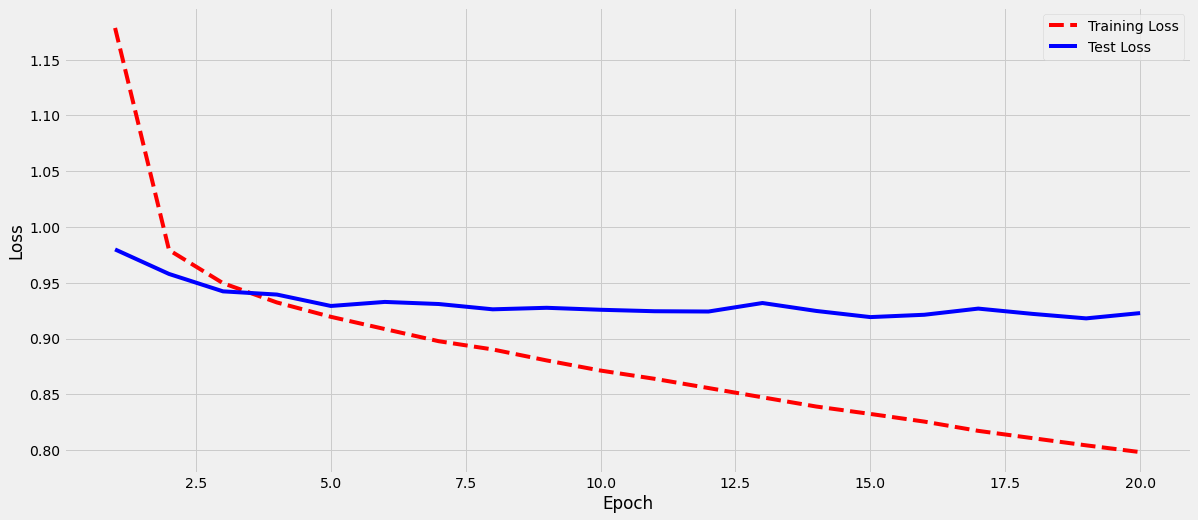

In [111]:
# Get training and test loss histories
training_loss2 = history.history['loss']
test_loss2 = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss2) + 1)

# Visualize loss history
#plotting training and test loss for each epoch
plt.plot(epoch_count, training_loss2, 'r--')
plt.plot(epoch_count, test_loss2, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [112]:
#loading a model from a file model1.h5
from tensorflow.keras.models import load_model

model1 = load_model('model1.h5')

In [113]:
#This function takes in a user_id, an anime_id and a model. It returns the predicted rating of the anime by the user.
def make_pred(user_id, anime_id, model):
    return model1.predict([np.array([user_id]), np.array([anime_id])])[0][0]

In [114]:
#This function returns the top 10 recommended anime for a given user.
def get_topN_rec(user_id, model):
    
    user_id = int(user_id) - 1
    user_ratings = rating[rating['user_id'] == user_id]
    recommendation = rating[~rating['anime_id'].isin(user_ratings['anime_id'])][['anime_id']].drop_duplicates()
    recommendation['rating_predict'] = recommendation.apply(lambda x: make_pred(user_id, x['anime_id'], model1), axis=1)
    
    final_rec = recommendation.sort_values(by='rating_predict', ascending=False).merge(anime_df[['anime_id', 'name', 'type', 'members']], on='anime_id').head(10)
    
    return final_rec.sort_values('rating_predict', ascending=False)[['name', 'type', 'rating_predict']]

In [124]:
#This code asks the user to enter a User ID and then prints out recommendations for that specific user.
User_ID_input = int(input("Enter User ID to get recommendations of the specific user: "))
print("------------------- Recommendations for User ID: "+ str(User_ID_input) + " -------------------")
get_topN_rec(User_ID_input, model1)

------------------- Recommendations for User ID: 50 ------------------
1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


,name,type,rating_predict
0,Eve no Jikan (Movie),Movie,4.285734
1,Galaxy Angel,TV,4.212350
2,Devilman,TV,4.172376
3,Precure All Stars Movie DX: Minna Tomodachi☆Kiseki no Zenin Daishuugou!,Movie,4.158083
4,Sotsugyou: Graduation,OVA,4.133307
5,IGPX: Immortal Grand Prix,TV,4.101565
6,Eikoku Koi Monogatari Emma: Intermission,Special,4.094418
7,Element Hunters,TV,4.061221
8,Gundress,Movie,4.022518
9,Oban Star-Racers,TV,4.022377
